In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import functions as fn

# Part a) Ordinary Least Squares on the data set

### Perform a OLS regression using polynomials in x and y up to fifth order. 
### Find the confidence interval nof the estimators $\beta$
### Use the MSE- and R2 score functions.  
### Scaling of the data, split of the data. 

In [ ]:
# Initializing the data
x_, y_, z = fn.init_data(70,0.3)

# Creating the design matrix
X = fn.create_X(x_, y_, n=5)

# Splitting into testing and training
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

# Inverting XTX matrix with SVD to avoid singular matrix
XTXinv = fn.SVDinv(X_train.T.dot(X_train))

# Estimating the Ordinary Least Squares Beta Matrix
OLSbeta = XTXinv.dot(X_train.T).dot(z_train)

# Making the prediciton
z_tilde = X_train @ OLSbeta
z_predict = X_test @ OLSbeta


# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")

## Beta coefficents and their 95% confidence intervals

In [ ]:
# Calculating the variance
betavariance = np.sqrt(np.diagonal(XTXinv)*np.var(z_train-z_tilde))

# Plotting the figure
fig, ax = plt.subplots(figsize=(15,6))

labels= ['1','$x$','$y$','$x^2$','$xy$','$y^2$','$x^3$','$x^2y$','$xy^2$','$y^3$','$x^4$',
         '$x^3y$','$x^2y^2$','$xy^3$','$y^4$','$x^5$','$x^4y$','$x^3y^2$','$x^2y^3$','$xy^4$','$y^5$']


x_pos = np.arange(len(OLSbeta))
ax.bar(x_pos, OLSbeta, yerr=2*betavariance, alpha=0.5,capsize=10)
ax.set_ylabel('Beta coeffient', fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize=14)
ax.set_title('Beta coefficient with confidence intervals of 95%', fontsize=20)

plt.show()

# Part b): Bias-variance trade-off and resampling techniques.

### Make a figure similar to Fig. 2.11 of Hasties, et al., with only the testing and training MSEs.
### Show that the cost function
### $C(\mathbf{X}, \mathbf{\beta}) = \frac{1}{n}\sum_{i=0}^{n-1}(y_i -\tilde{y_i})^2 = \mathbb{E}[(\mathbf{y}-\mathbf{\tilde{y}})^2] $
### can be rewritten as 
### $\mathbb{E}[(\mathbf{y}-\mathbf{\tilde{y}})^2] = \frac{1}{n}\sum_{i} (f_i -\mathbb{E}[\mathbf{\tilde{y}}])^2 +  \frac{1}{n}\sum_{i}(y_i -\mathbb{E}[\mathbf{\tilde{y}}])^2 + \sigma^2$

### Explain the terms, which one is bias and variance and their interpretations

### Perform bias variance tradeoff with increasing polynomials (model complexity) and number of data points, and bootstrap resampling methods on the training and testing data

# Computing the expectance of the train and test error for increasing complexity over 300 different runs

In [78]:
import sklearn
import sklearn.linear_model

# Initializing the data parameters
N = 100
noisefactor = 0.5
test_size = 0.2
iterations = 20
n =  20
# Creating arrays for train and test error
TrainError = np.zeros(n)
TestError = np.zeros(n)


# Calculating Test and Training error over many iterations to get the expected value of train and test error.

# Initializing the data
x_, y_, z = fn.init_data(N, noisefactor)


for k in range(iterations):
    
    
    
    
    for i in range(1,n):
        # Creating design matrix, splitting and scaling
        # X_train, X_test, z_train, z_test = fn.PreProcess(x_, y_, z, test_size, i)
        X = sklearn.preprocessing.PolynomialFeatures(i).fit_transform(np.c_[x_.ravel()[:,None], y_.ravel()[:,None]])

        
        X_train, X_test, z_train, z_test = sklearn.model_selection.train_test_split(X,z.ravel(), test_size=test_size)

        
        OLSbeta = sklearn.linear_model.LinearRegression(fit_intercept=False).fit(X_train, z_train).coef_
        
        
        # How many columns of the design matrix allowed.
        #q = int((i+1)*(i+2)/2)
        #X_trainD = X_train[:,:q]
        #X_testD = X_test[:,:q]

        # Estimating the Ordinary Least Squares Beta Matrix
        # Inverting XTX matrix with SVD to avoid singular matrix
        #OLSbeta = fn.SVDinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train)

        
        #U, S, VT = np.linalg.svd(X_train, full_matrices=False)
        #OLSbeta  = VT.T @ np.diag(1/S**2) @ np.diag(S) @ U.T @ z_train
        # Making the prediciton
        z_tilde = X_train @ OLSbeta
        z_predict = X_test @ OLSbeta

        
        
        
        TrainError[i] += fn.MSE(z_train, z_tilde)/iterations
        TestError[i] += fn.MSE(z_test, z_predict)/iterations
    


In [ ]:
import sklearn
import sklearn.linear_model

# Initializing the data parameters
N = 100
noisefactor = 0.5
test_size = 0.2
iterations = 20
n =  20
# Creating arrays for train and test error
TrainError = np.zeros(n)
TestError = np.zeros(n)


# Calculating Test and Training error over many iterations to get the expected value of train and test error.

# Initializing the data
x_, y_, z = fn.init_data(N, noisefactor)


for k in range(iterations):
    for i in range(1,n):
        # Creating design matrix, splitting and scaling
        # X_train, X_test, z_train, z_test = fn.PreProcess(x_, y_, z, test_size, i)
        X = sklearn.preprocessing.PolynomialFeatures(i).fit_transform(np.c_[x_.ravel()[:,None], y_.ravel()[:,None]])

        
        X_train, X_test, z_train, z_test = sklearn.model_selection.train_test_split(X,z.ravel(), test_size=test_size)

        
        OLSbeta = sklearn.linear_model.LinearRegression(fit_intercept=False).fit(X_train, z_train).coef_
        
        
        # How many columns of the design matrix allowed.
        #q = int((i+1)*(i+2)/2)
        #X_trainD = X_train[:,:q]
        #X_testD = X_test[:,:q]

        # Estimating the Ordinary Least Squares Beta Matrix
        # Inverting XTX matrix with SVD to avoid singular matrix
        #OLSbeta = fn.SVDinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train)

        
        #U, S, VT = np.linalg.svd(X_train, full_matrices=False)
        #OLSbeta  = VT.T @ np.diag(1/S**2) @ np.diag(S) @ U.T @ z_train
        # Making the prediciton
        z_tilde = X_train @ OLSbeta
        z_predict = X_test @ OLSbeta

        
        
        
        TrainError[i] += fn.MSE(z_train, z_tilde)/iterations
        TestError[i] += fn.MSE(z_test, z_predict)/iterations
    


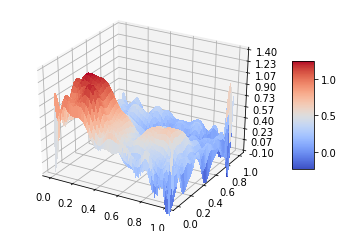

In [74]:
z_total = fn.create_X(x_,y_,n-1) @ OLSbeta
z_total = z_total.reshape(x_.shape)
        


fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x_, y_, z_total, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)


# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [75]:
print(fn.MSE(z, z_total))
print(np.max(np.abs(z-z_total)))

0.24721985187175932
2.1397027470422914


In [79]:
startpoint = 1
endpoint = 20

plt.plot(np.arange(n)[startpoint:endpoint],TrainError[startpoint:endpoint],'b' ,label='Train Error')
plt.plot(np.arange(n)[startpoint:endpoint],TestError[startpoint:endpoint],'r' ,label='Test Error')
plt.xlabel('Polynomial Degree $n$')
plt.ylabel('MSE')
plt.title(" MSE average over {0} iterations \nTesting size {1}, Noise: {2}, N = {3}".format(iterations, test_size, noisefactor, N))

plt.legend()

In [66]:
print(TrainError)

[0.         0.2719115  0.26755598 0.25743485 0.2565648  0.25313632
 0.25039588 0.24815749 0.25227859 0.24768592]


## Flere kolonner enn rader, finnes det uendelig med løsninger. 

## Perform bias variance tradeoff with increasing polynomials (model complexity) and number of data points, and bootstrap resampling methods on the training and testing data

### Incorporating bootstrap techniques

In [80]:
# Data Parameters
N = 30
noisefactor = 0.5
test_size = 0.2
n = 30

# Initializing the data
x_, y_, z = fn.init_data(N, noisefactor)

# Creating design matrix, splitting and scaling
X_train, X_test, z_train, z_test = fn.PreProcess(x_, y_, z, test_size, n)

# Intializing error bias and variance
error = np.zeros(n)
bias = np.zeros(n)
variance = np.zeros(n)

# Bootstrap parameters
n_bootstraps = 100

for i in range(n):
    # How many columns of the design matrix allowed.
    q = int((i+1)*(i+2)/2)
    X_trainD = X_train[:,:q]
    X_testD = X_test[:,:q]

    # Setting up the array for the bootstrapped predictions
    z_pred = np.empty((z_test.shape[0], n_bootstraps))
    
    for j in range(n_bootstraps):
        x_, z_  = fn.Shuffle_Data(X_trainD, z_train)
        OLSbeta = fn.SVDinv(x_.T.dot(x_)).dot(x_.T).dot(z_) 
        z_pred[:,j] = X_testD @ OLSbeta 

    #Reshaping
    z_test = z_test.reshape(len(z_test),1)
    
    error[i], bias[i], variance[i] = fn.ErrBiasVar(z_test, z_pred)

In [81]:
startpoint = 0
endpoint = 15


plt.plot(np.arange(n)[startpoint:endpoint], error[startpoint:endpoint], label='Error')
plt.plot(np.arange(n)[startpoint:endpoint], bias[startpoint:endpoint], label='bias')
plt.plot(np.arange(n)[startpoint:endpoint], variance[startpoint:endpoint], label='Variance')
plt.legend()
plt.ylabel("Error", fontsize=12)
plt.xlabel("Polynomial order",  fontsize=12)
plt.title("Bias-Variance Tradeoff\n (noise = {0}, N = {1}, {2} bootstraps) \n".format(noisefactor, N, n_bootstraps), fontsize =14)
plt.savefig("BootstrapBiasVariance.png", dpi=100)

plt.show()


# c) Cross-Validation as resampling techniques, adding more complexity.

In [ ]:
# Data Parameters
N = 30
noisefactor = 0.5
test_size = 0.2
n = 30

# Initializing the data
x_, y_, z = fn.init_data(N, noisefactor)

# Creating design matrix, splitting and scaling
X_train, X_test, z_train, z_test = fn.PreProcess(x_, y_, z, test_size, n)

# Intializing error bias and variance
error = np.zeros(n)
bias = np.zeros(n)
variance = np.zeros(n)

# CV fold parameters 
folds = 10
foldsize = np.int(len(X_train)/folds)

for i in range(n):
    # How many columns of the design matrix allowed.
    q = int((i+1)*(i+2)/2)
    X_trainD = X_train[:,:q]
    X_testD = X_test[:,:q]

    # Setting up the array for the CV-fold predictions
    z_pred = np.empty((z_test.shape[0], folds))
    
    for j in range(folds):

        # Reshuffling the data
        x_, z_ = fn.Shuffle_Data(X_trainD, z_train)
        
        x_ = x_[(foldsize*j):(foldsize*(j+1)),:]
        z_ = z_[(foldsize*j):(foldsize*(j+1))]
        
        # Computing the beta matrix on the fold
        OLSbeta = fn.SVDinv(x_.T.dot(x_)).dot(x_.T).dot(z_) 
        z_pred[:,j] = X_testD @ OLSbeta 

    #Reshaping
    z_test = z_test.reshape(len(z_test),1)
    
    error[i], bias[i], variance[i] = fn.ErrBiasVar(z_test, z_pred)

In [ ]:
startpoint = 0
endpoint = 15


plt.plot(np.arange(n)[startpoint:endpoint], error[startpoint:endpoint], label='Error')
plt.plot(np.arange(n)[startpoint:endpoint], bias[startpoint:endpoint], label='bias')
plt.plot(np.arange(n)[startpoint:endpoint], variance[startpoint:endpoint], label='Variance')
plt.legend()
plt.ylabel("Error", fontsize=12)
plt.xlabel("Polynomial order",  fontsize=12)
plt.title("Bias-Variance Tradeoff\n (noise = {0}, N = {1}, k-fold = {2} ) \n".format(noisefactor, N, folds), fontsize =14)
plt.savefig("kFoldbiasVaraiance.png", dpi=100)

plt.show()


# d) Ridge Regression on the Franke funcion with resampling

### Perform Ridge Regression with either matrix inversion or SVD.
### Use bootstrap for the same polynomial range as in b), and cross-valdiation as in c), but plotted for different values of $\lambda$

### Bootstrapping:

In [ ]:
# Data Parameters
N = 30
noisefactor = 0.5
test_size = 0.2
n = 30

# Initializing the data
x_, y_, z = fn.init_data(N, noisefactor)

# Creating design matrix, splitting and scaling
X_train, X_test, z_train, z_test = fn.PreProcess(x_, y_, z, test_size, n)

# Lambda
lamb = 10**np.linspace(-13,1,15)

# Bootstrap parameters
n_bootstraps = 50


# Intializing error bias and variance
error = np.zeros((len(lamb),len(n)))
bias = np.zeros((len(lamb),len(n)))
variance = np.zeros((len(lamb),len(n)))



for k in range(len(lamb)):
        for i in range(len(n)):
            # How many columns of the design matrix allowed.
            q = int((i+1)*(i+2)/2)
            X_trainD = X_train[:,:q]
            X_testD = X_test[:,:q]

            # Setting up the array for the bootstrapped predictions
            z_pred = np.empty((z_test.shape[0], n_bootstraps))

            for j in range(n_bootstraps):
                x_, z_  = fn.Shuffle_Data(X_trainD, z_train)
                RIDGEbeta = fn.SVDinv(x_.T.dot(x_)+lamb[k]*np.eye(q)).dot(x_.T).dot(z_) 
                z_pred[:,j] = X_testD @ RIDGEbeta 

            #Reshaping
            z_test = z_test.reshape(len(z_test),1)


            error[k,i] = np.mean( np.mean((z_test - z_pred)**2, axis=1, keepdims=True) )
            bias[k,i]  = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
            variance[k,i] = np.mean( np.var(z_pred, axis=1, keepdims=True) )

In [ ]:
def betaplot(OLSbeta):
    x_pos = np.arange(len(OLSbeta))
    ax.bar(x_pos, OLSbeta, alpha=0.5,capsize=10)
    ax.set_ylabel('Beta coeffient', fontsize=14)
    ax.set_xticks(x_pos)
    #ax.set_xticklabels(labels, fontsize=14)
    ax.set_title('Beta coefficient with confidence intervals of 95%', fontsize=20)

    plt.show()

In [ ]:
startpoint = 0
endpoint = 30

for k in range(len(lamb)):
    

    plt.plot(n[startpoint:endpoint], error[k,startpoint:endpoint], label='Error')
    plt.plot(n[startpoint:endpoint], bias[k,startpoint:endpoint], label='bias')
    plt.plot(n[startpoint:endpoint], variance[k,startpoint:endpoint], label='Variance')
    plt.title("Bias Variance tradeoff using bootstrapping \n lambda =%.13f" % lamb[k])
    plt.legend()
    plt.ylim(-0.01, 0.5)
    plt.show()

### Auxiliary 3D plotting of the error/bias/variance as a function of increasing complexity and penalty term lamdba

In [ ]:

loglamb = np.log10(lamb)
n_, loglamb_  = np.meshgrid(n, loglamb)


fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(n_, loglamb_, bias, label='error', cmap=cm.coolwarm,
                        linewidth=5, antialiased=False)
plt.title("")

# Changing the size of the plot
#fig_size[0]=20
#fig_size[1]=12
#plt.rcParams["figure.figsize"] = fig_size

# Changing the viewing distance
ax.dist = 13

# axis labels

ax.set_xlabel('\n Polynomial Degree', fontsize=12, rotation=150)
ax.set_ylabel('\n log10(Lambda)', fontsize=12, rotation=150)
ax.set_zlabel('\n bias', fontsize=12, rotation=150)
#ax.yaxis.set_scale('log')

# Customize the z axis.
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.3, aspect=5)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

loglamb = np.log10(lamb)
n_, loglamb_  = np.meshgrid(n, loglamb)

fig = plt.figure()
ax = fig.gca(projection='3d')

#ax.plot_surface(n_, loglamb_, error, rstride=120, cstride=120, alpha=0.2)

cset = ax.contour(n_, loglamb_, error, zdir='z', offset=-0.01, cmap=cm.coolwarm)
cset = ax.contour(n_, loglamb_, error, zdir='x', offset=-2, cmap=cm.coolwarm)
cset = ax.contour(n_, loglamb_, error, zdir='y', offset=np.max(loglamb), cmap=cm.coolwarm)

ax.set_xlabel('\n Polynomial Degree', fontsize=12, rotation=150)
ax.set_ylabel('\n log10(Lambda)', fontsize=12, rotation=150)
ax.set_zlabel('\n Error', fontsize=12, rotation=150)
ax.set_zlim(-0.01, 0.8)

#cbar = plt.colorbar(cset)
#cbar.solids.set_edgecolor("face")



plt.show()







# e) Lasso Regression on the Franke function with resampling

### Perform Lasso Regression with Scikit-Learn.
### Use bootstrap for the same polynomial range as in b), and cross-valdiation as in c), but plotted for different values of $\lambda$
### Give a critical discussion of the three methods and a judgement of which model fits the data best.

In [ ]:
# Data Parameters
N = 30
noisefactor = 0.5
test_size = 0.2
n = 10

# Initializing the data
x_, y_, z = fn.init_data(N, noisefactor)

# Creating design matrix, splitting and scaling
X_train, X_test, z_train, z_test = fn.PreProcess(x_, y_, z, test_size, n)



# Lambda
lamb = 10**np.linspace(-5,0,6)

# Bootstrap parameters
n_bootstraps = 100

# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))

for k in range(len(lamb)):
        for i in range(n):
            # How many columns of the design matrix allowed.
            q = int((i+1)*(i+2)/2)
            X_trainD = X_train[:,:q]
            X_testD = X_test[:,:q]

            # Setting up the array for the bootstrapped predictions
            z_pred = np.empty((z_test.shape[0], n_bootstraps))

            for j in range(n_bootstraps):
                x_, z_  = fn.Shuffle_Data(X_trainD, z_train)
                
                # Lasso regression
                clf = linear_model.Lasso(alpha=lamb[k], fit_intercept=False, max_iter=10e5)
                clf.fit(X_trainD, z_train)
                LASSObeta = clf.coef_
                z_pred[:,j] = X_testD @ LASSObeta 

            #Reshaping
            z_test = z_test.reshape(len(z_test),1)


            error[k,i] = np.mean( np.mean((z_test - z_pred)**2, axis=1, keepdims=True) )
            bias[k,i]  = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
            variance[k,i] = np.mean( np.var(z_pred, axis=1, keepdims=True) )

In [ ]:
from sklearn import linear_model

# Data Parameters
N = 30
noisefactor = 0.5
test_size = 0.2
n = 30

# Initializing the data
x_, y_, z = fn.init_data(N, noisefactor)

# Creating design matrix, splitting and scaling
X_train, X_test, z_train, z_test = fn.PreProcess(x_, y_, z, test_size, n)

# Creating arrays for train and test error
TrainError = np.zeros(n)
TestError = np.zeros(n)

# Lambda for the penalty term
lamb = 0

for i in range(n):
    # How many columns of the design matrix allowed.
    q = int((i+1)*(i+2)/2)
    X_trainD = X_train[:,:q]
    X_testD = X_test[:,:q]
    
    # Lasso regression
    clf = linear_model.Lasso(alpha=lamb, fit_intercept=False)
    clf.fit(X_trainD, z_train)
    LASSObeta = clf.coef_

    # Making the prediciton
    z_tilde = X_trainD @ LASSObeta
    z_predict = X_testD @ LASSObeta
    
    TrainError[i] = fn.MSE(z_train, z_tilde)
    TestError[i] = fn.MSE(z_test, z_predict)
    


In [ ]:
startpoint = 0
endpoint = 5
fig, ax = plt.subplots(figsize=(9,6))

for k in range(1):
    ax.plot(np.arange(n)[startpoint:endpoint], error[k,startpoint:endpoint], label='Error,  $\lambda$ = {}'.format(lamb[k]))
    ax.plot(np.arange(n)[startpoint:endpoint], bias[k,startpoint:endpoint], linestyle='--', label='Bias, $\lambda$ = {}'.format(lamb[k]))
    ax.plot(np.arange(n)[startpoint:endpoint], variance[k,startpoint:endpoint], linestyle='dashdot', label='Variance, $\lambda$ = {}'.format(lamb[k]))

plt.ylabel("Error", fontsize=12)
plt.xlabel("Polynomial order",  fontsize=12)
plt.title("Lasso Regression\n (noise = {0}, N = {1}, {2} bootstraps ) \n".format(noisefactor, N, n_bootstraps), fontsize =14)
#plt.savefig("LassoRegression.png", dpi=100)
plt.legend()
plt.show()

In [ ]:
from sklearn import linear_model

# Initalizing
N = 30
n = np.arange(15)

# Initalizing the dataset
x, y = np.random.uniform(0,1,size=(2,N))
x_,y_ = np.meshgrid(x,y)

z = fn.FrankeFunction(x_, y_,0.5)
z = np.ravel(z)

# Creating design matrix for the maximum polynomial degree. 
X = fn.create_X(x_,y_,n[-1])

# Test Train splitting of data
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

# Scaling the train and test set
X_train, X_test = fn.Scaling(X_train, X_test)

# Lambda
lamb = 10**np.linspace(-7,1,8)

# Bootstrap parameters
n_bootstraps = 10


# Intializing error bias and variance
error = np.zeros((len(lamb),len(n)))
bias = np.zeros((len(lamb),len(n)))
variance = np.zeros((len(lamb),len(n)))



for k in range(len(lamb)):
        for i in range(len(n)):
            # How many columns of the design matrix allowed.
            q = int((i+1)*(i+2)/2)
            X_trainD = X_train[:,:q]
            X_testD = X_test[:,:q]

            # Setting up the array for the bootstrapped predictions
            z_pred = np.empty((z_test.shape[0], n_bootstraps))

            for j in range(n_bootstraps):
                x_, z_  = fn.Shuffle_Data(X_trainD, z_train)
                clf = linear_model.Lasso(alpha=lamb[k], fit_intercept=False)
                clf.fit(x_, z_)
                LASSObeta = clf.coef_
                z_pred[:,j] = X_testD @ LASSObeta 

            #Reshaping
            z_test = z_test.reshape(len(z_test),1)


            error[k,i] = np.mean( np.mean((z_test - z_pred)**2, axis=1, keepdims=True) )
            bias[k,i]  = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
            variance[k,i] = np.mean( np.var(z_pred, axis=1, keepdims=True) )



In [ ]:
startpoint = 0
endpoint = 15
for k in range(len(lamb)):
    plt.plot(n[startpoint:endpoint], error[k,startpoint:endpoint], label='Error')
    plt.plot(n[startpoint:endpoint], bias[k,startpoint:endpoint], label='bias')
    plt.plot(n[startpoint:endpoint], variance[k,startpoint:endpoint], label='Variance')
    plt.title("Bias Variance tradeoff with Lasso regression using n_bootstraps =  10 \n lambda =%.07f" % lamb[k])
    plt.legend()
    #plt.ylim(-0.01, 0.2)
    plt.show()

# f) Introducing real data and preparing the data analysis

### Get data from dta folder of project 1. 

In [ ]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# Load the terrain
terrain1 = imread("SRTM_data_lahelle.tif")
# Show the terrain
plt.figure()
plt.title("Terrain over Norway 1")
plt.imshow(terrain1, cmap="gray")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [ ]:
imarray = np.array(terrain1)


In [ ]:
plt.imshow(terrain1[3000:3200, 400:600], cmap="gray")

In [ ]:
imarray.shape

In [ ]:
imarray[3000:3100, 400:500]

# g) OLS, Ridge and Lasso regression with resampling

### Apply all three methods on the terrain data, with the same polynomial approximation and cross-validation as resampling technique to evaluate which model fits the data best.
### "Present a critical evaluation of your results and disucss the applicability of these regreesion methods to the type of the data presented here (either the terrain data we propose or other data sets)."

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()